## Test Emotion for Maya

In [2]:
import socket
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DataAPI import MayaController
import itertools
import json
import os
from IPython.display import clear_output
from csv import writer

#### Open server

import maya.cmds as cmds

cmds.commandPort(n="localhost:12345")

cmds.commandPort(cl=True, n="localhost:12345")

In [3]:
controller = MayaController()

### Data Interpolation

In [4]:
df = pd.read_csv("../data/BlendFaces.csv")
df

,Name,V,A,D,Blink,EyelidUp,A.1,E,O,MouthOpen,...,M,MouthUp,MouthWide,MouthWide2,MouthDown,MouthOneSideUp,EyeBrowInDown,EyeBrowOutDown,EyeBrowUp,EyeBrowSwag
0,Happy,1.000,0.735,0.772,0.0,0.5,0.1,0.1,0.0,0.0,...,0.0,0.7,0.7,0.0,0.0,0.0,0.0,-0.1,0.1,0.0
1,Excited,0.908,0.931,0.709,0.0,0.5,0.3,0.3,0.1,0.1,...,0.0,0.5,0.5,0.2,0.0,0.0,0.0,-0.1,0.3,0.0
2,Surprise,0.784,0.855,0.539,-0.1,0.0,0.0,0.0,0.8,0.8,...,0.0,0.0,0.0,0.5,0.2,0.0,-0.2,0.0,0.5,0.0
3,Curious,0.635,0.600,0.483,-0.1,0.2,0.3,0.3,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3
4,Sad,0.225,0.335,0.149,0.2,0.0,0.4,0.0,0.0,-0.5,...,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.4,-0.3,0.0
5,Tired,0.125,0.317,0.191,0.3,0.2,0.0,0.0,0.0,0.0,...,-0.5,0.0,0.0,0.0,0.3,0.0,0.1,0.2,-0.3,0.0
6,Scared,0.146,0.828,0.185,-0.2,-0.2,0.5,0.5,0.0,0.0,...,0.0,-0.5,0.4,0.4,0.6,0.0,-0.2,0.3,0.4,0.0
7,Angry,0.122,0.830,0.604,0.0,0.5,0.0,0.0,0.2,0.0,...,0.5,0.0,0.0,-0.5,0.0,0.0,0.6,0.0,0.0,0.0
8,Neutral,0.469,0.184,0.357,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Confused,0.220,0.650,0.179,0.1,-0.1,0.5,0.0,0.3,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.2,-0.2,0.0,0.0


In [5]:
def print_json(j):
    print(json.dumps(j, indent=4))

def StoreDataToCSV(data: list, load_dir: str):
    '''
    Save the skeleton data to csv
    '''     
    with open(load_dir, 'a') as write_obj:
        csv_writer = writer(write_obj)
        csv_writer.writerow(data)

def GetData(load_dir):
    '''
    Get the data from the csv file
    '''
    df = pd.read_csv(load_dir)
    data = df.iloc[:, :].to_numpy()
    name = data[:, 0]
    y = data[:, 1:4]
    x = data[:, 4:]
    return x, y, name

In [10]:
# Advanced Skeleton 
def AS_ListToJson(data:list):
    return {
        "ctrlBrow_L": {"translateX": data[0], "translateY": data[1]}
        ,"ctrlBrow_R": {"translateX": data[2], "translateY": data[3]}
        ,"ctrlMouth_M": {"translateX": data[4], "translateY": data[5],
                        "upperSqueeze": data[6], "lowerSqueeze": data[7]}
        ,"ctrlMouthCorner_L": {"translateX": data[8], "translateY": data[9]}
        ,"ctrlMouthCorner_R": {"translateX": data[10], "translateY": data[11]}
        ,"ctrlEye_L": {"squint": data[12]}
        ,"ctrlEye_R": {"squint": data[13]}
    }

# Blend Faces
def BF_ListToJson(data:list):
    return {"Morpher": 
        {"Blink": data[0]
        ,"EyelidUp": data[1]
        ,"A": data[2]
        ,"E": data[3]
        ,"O": data[4]
        ,"MouthOpen": data[5]
        ,"FV": data[6]
        ,"M": data[7]
        ,"MouthUp": data[8]
        ,"MouthWide": data[9]
        ,"MouthWide2": data[10]
        ,"MouthDown": data[11]
        ,"MouthOneSideUp": data[12]
        ,"EyebrowInDown": data[13]
        ,"EyebrowOutDown": data[14]
        ,"EyebrowUp": data[15]
        ,"EyebrowSwag": data[16]
        }
    }

In [15]:
def EmotionInterpolation(load_dir: str, save_dir: str, cur_num, n:int):
    '''
    Interpolate the emotions and save both the screenshots and the facial attributes as dictionaries
    :param
        load_dir: loading directory of the csv file
        save_dir: saving directory of the screenshots
        cur_num: number of existing data
        n: number of interpolations between poses 
    :return: list of interpolated emotion attributes
    '''
    count = 1
    # Get every poses
    df = pd.read_csv(load_dir)
    data = df.iloc[:cur_num, :].to_numpy()

    for strt_pose, end_pose in itertools.combinations(data, r=2):
        # Interpolate new emotions
        new_data = np.copy(strt_pose)
        for k in range(n):
            for i in range(1, len(strt_pose)):
                diff = (end_pose[i] - strt_pose[i]) / (n + 1)
                new_data[i] += diff
            new_data[0] = strt_pose[0] + '-' + end_pose[0]

            # Import to Maya and Take a screenshot
            controller.SetMultipleAttributes(BF_ListToJson(new_data[4:]))
            controller.ScreenShot(save_dir + new_data[0])
            
            StoreDataToCSV(new_data, load_dir)
            # This is for debugging
            clear_output(wait=True)
            print("Number of Interpolation Completed: %d" % count)
            count += 1

In [19]:
EmotionInterpolation(
    load_dir = "../data/BlendFaces.csv",
    save_dir = "/home/vince/Documents/research/EQTest/data/Facial_img/BF/",
    cur_num = 17,
    n=1
)

Number of Interpolation Completed: 136


### PCA

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

In [59]:
x, y, name = GetData("../data/BlendFaces.csv")
pca = PCA(n_components=3)
pca_result = pca.fit_transform(x)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.21156491 0.18465255 0.14296822]


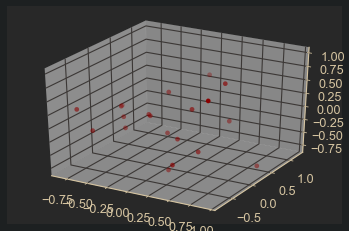

In [60]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(pca_result[:,0], pca_result[:,1], pca_result[:,2], c="darkred")

In [61]:
y_tilda = np.c_[y, np.ones(len(y))]
result = np.linalg.lstsq(y_tilda, pca_result, rcond=None)[0]
result

array([[-1.2555246 ,  0.07864519, -0.67442256],
       [-0.28806567,  0.6750047 ,  0.62966541],
       [ 0.68810208, -0.18987076,  1.20260903],
       [ 0.33960789, -0.3944215 , -0.6717947 ]])

In [62]:
def PCAPrediction(vad:list):
    z = np.dot(vad, result[:3]) + result[3]
    joints = np.dot(z, pca.components_)
    return joints

In [74]:
pred = PCAPrediction([0.1,0.9,0.7])
print(pred)
controller.SetMultipleAttributes(BF_ListToJson(pred))

[ 0.02475688  0.28041812 -0.04063892 -0.14314933 -0.2565621   0.03749303
  0.41257535  0.35872892  0.03184112 -0.04141832 -0.13432193  0.16844662
 -0.0918804   0.31375753 -0.11560474  0.09297048 -0.02523098]


### Nearest Neighbor

In [35]:
def Dist(a, b):
    return sum((i - j) ** 2 for i, j in zip(a,b))

In [38]:
def NearestNeighbor(vad:list, target: str):
    '''
    Generate facial information from VAD vector
    '''
    d = 3
    index = 0
    x, y, name = GetData('../data/BlendFaces.csv')
    for i, label in enumerate(y):
        dist = Dist(label, vad)
        if Dist(label, vad) < d:
            d = dist
            index = i
    print("Nearest neighbor for %s is: %s" % (target, name[index]))

In [39]:
NearestNeighbor([0.235,0.82,0.213], "Nervous") 
NearestNeighbor([0.764,0.296,0.559], "Content") 
NearestNeighbor([0.677,0.49,0.696], "Appraise")
NearestNeighbor([0.104,0.804,0.44], "Madness") 
NearestNeighbor([0.123,0.423,0.202], "Exhausted") 
NearestNeighbor([0.206,0.635,0.396], "Contempt") 
NearestNeighbor([0.927,0.344,0.758], "Respect") 
NearestNeighbor([0.816,0.337,0.705], "Helpful")

Nearest neighbor for Nervous is: Scared-Concerned
Nearest neighbor for Content is: Neutral -Delight
Nearest neighbor for Appraise is: Happy-Neutral 
Nearest neighbor for Madness is: Madness
Nearest neighbor for Exhausted is: Tired -Embarrased
Nearest neighbor for Contempt is: Frustrated-Mock
Nearest neighbor for Respect is: Happy-Neutral 
Nearest neighbor for Helpful is: Happy-Neutral 


In [168]:
controller.Close()